# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL 
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=2a9b89c9cf19ebdf2a26cc4ecb319413&units=metric&q=


In [4]:
# run single example of query output so we can know how to create for loop correctly
city1 = cities[23]

response1 = requests.get(query_url + city).json()
response1

{'coord': {'lon': 20.04, 'lat': -34.53},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 14.56,
  'feels_like': 11.82,
  'temp_min': 13.33,
  'temp_max': 15,
  'pressure': 1011,
  'humidity': 82},
 'wind': {'speed': 4.6, 'deg': 340},
 'rain': {'3h': 0.38},
 'clouds': {'all': 69},
 'dt': 1580014701,
 'sys': {'type': 1,
  'id': 1966,
  'country': 'ZA',
  'sunrise': 1580010800,
  'sunset': 1580061052},
 'timezone': 7200,
 'id': 1015776,
 'name': 'Bredasdorp',
 'cod': 200}

In [5]:
# give results of a single city to check code is working
City1 = response1['name']
Cloudiness1 = response1["clouds"]["all"]
Country1 = response1['sys']['country']
Humidity1 = response1['main']['humidity']
Lat1 = response1['coord']['lat']
Lng1 = response1['coord']['lon']
Max_Temp1 = response1['main']['temp_max']
Wind_Speed1 = response1['wind']['speed']

print(City1, Cloudiness1, Country1, Humidity1, Lat1, Lng1, Max_Temp1, Wind_Speed1)

Bredasdorp 69 ZA 82 -34.53 20.04 15 4.6


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# set up lists to hold reponse info
Citiesfound = []
Country = []
Cloudiness = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

counter = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    try: 
        response = requests.get(query_url + city).json()
        Citiesfound.append(response['name'])
        Country.append(response['sys']['country'])
        Cloudiness.append(response["clouds"]["all"])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f"Making request {counter} for city: {city}")
        counter = counter + 1
        #time.sleep(1.01)
    
    except: 
        print("City not found... skipping.")  
 

Making request 0 for city: shache
Making request 1 for city: ushuaia
Making request 2 for city: hilo
Making request 3 for city: khatanga
Making request 4 for city: punta arenas
Making request 5 for city: port elizabeth
Making request 6 for city: hofn
Making request 7 for city: dingle
Making request 8 for city: avarua
Making request 9 for city: kruisfontein
City not found... skipping.
Making request 10 for city: dikson
Making request 11 for city: busselton
Making request 12 for city: narsaq
Making request 13 for city: geraldton
Making request 14 for city: tynda
Making request 15 for city: omboue
Making request 16 for city: rikitea
Making request 17 for city: cape town
Making request 18 for city: luebo
City not found... skipping.
Making request 19 for city: cidreira
Making request 20 for city: darnah
Making request 21 for city: barrow
Making request 22 for city: kodiak
Making request 23 for city: lingyuan
Making request 24 for city: aykhal
Making request 25 for city: najran
Making reques

Making request 205 for city: flinders
Making request 206 for city: edd
City not found... skipping.
Making request 207 for city: yaan
Making request 208 for city: ambon
Making request 209 for city: inuvik
Making request 210 for city: patiya
Making request 211 for city: bredasdorp
Making request 212 for city: provideniya
Making request 213 for city: penzance
Making request 214 for city: ponta delgada
Making request 215 for city: dwarka
Making request 216 for city: tsumeb
Making request 217 for city: kahului
Making request 218 for city: norrtalje
Making request 219 for city: kamenka
Making request 220 for city: wanning
Making request 221 for city: urumqi
Making request 222 for city: cody
Making request 223 for city: vila franca do campo
Making request 224 for city: palmer
Making request 225 for city: raudeberg
Making request 226 for city: paducah
Making request 227 for city: yantal
City not found... skipping.
Making request 228 for city: eyl
Making request 229 for city: pinega
Making requ

Making request 412 for city: port hedland
Making request 413 for city: luanda
Making request 414 for city: kaeo
Making request 415 for city: mweka
Making request 416 for city: chuy
Making request 417 for city: port hawkesbury
Making request 418 for city: belaya
Making request 419 for city: hay river
Making request 420 for city: garmsar
Making request 421 for city: caravelas
Making request 422 for city: margate
Making request 423 for city: purworejo
Making request 424 for city: mindelo
Making request 425 for city: tosagua
City not found... skipping.
Making request 426 for city: tongzi
Making request 427 for city: alamosa
Making request 428 for city: waddan
Making request 429 for city: coihaique
Making request 430 for city: mangrol
Making request 431 for city: quchan
Making request 432 for city: airai
Making request 433 for city: okhotsk
Making request 434 for city: bilma
Making request 435 for city: avila
Making request 436 for city: thomasville
Making request 437 for city: broken hill


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a dictionary, and then data frame from each variable
weather_dict = {
    "City": Citiesfound,
    "Country": Country,
    "Cloudiness": Cloudiness,
    "Humidity": Humidity,
    "Lat":Lat,
    "Lng":Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}

# Create dataframe and display
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Country,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Shache,CN,98,97,38.42,77.24,0.56,0.63
1,Ushuaia,AR,72,96,-54.80,-68.30,1.88,2.66
2,Hilo,US,90,65,19.73,-155.09,25.00,1.50
3,Khatanga,RU,57,98,71.97,102.50,-29.85,1.36
4,Punta Arenas,CL,20,70,-53.15,-70.92,9.00,5.70
...,...,...,...,...,...,...,...,...
541,Sao Joao da Barra,BR,100,91,-21.64,-41.05,22.39,2.38
542,Wajir,KE,100,68,1.75,40.06,27.65,4.08
543,Oranjestad,AW,20,83,12.52,-70.03,26.00,3.60
544,Narasannapeta,IN,29,42,18.42,84.05,29.23,2.86


In [8]:
# Export to .csv 
weather_data.to_csv('../output_data/cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

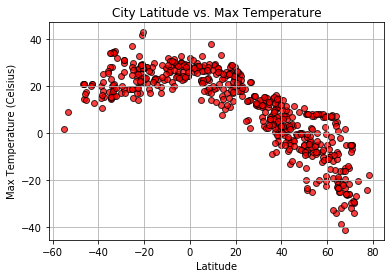

In [9]:
# Create scatter plot
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Add labels to the x and y axes
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.grid()

# Save the plot and display it
plt.savefig("../Images/lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

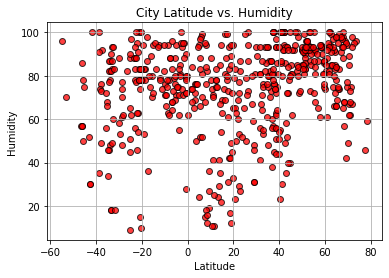

In [10]:
# Create scatter plot
plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Add labels to the x and y axes
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the plot and display it
plt.savefig("../Images/lat_vs_hum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

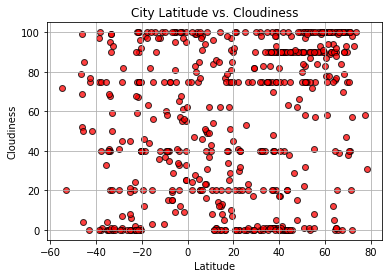

In [11]:
# Create scatter plot
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Add labels to the x and y axes
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the plot and display it
plt.savefig("../Images/lat_vs_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

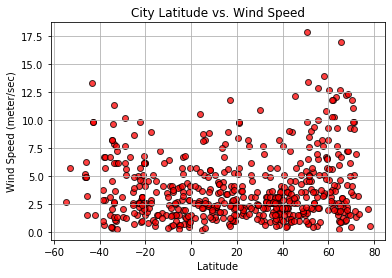

In [12]:
# Create scatter plot
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Add labels to the x and y axes
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meter/sec)")
plt.grid()

# Save the plot and display it
plt.savefig("../Images/lat_vs_wind.png")
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots


In [14]:
# Create Northern and Southern Hemisphere DataFrames
northhem = weather_data.loc[weather_data['Lat'] > 0]
print(northhem.head())

southhem = weather_data.loc[weather_data['Lat'] < 0]
print(southhem.head())

       City Country  Cloudiness  Humidity    Lat     Lng  Max Temp  Wind Speed
0    Shache      CN          98        97  38.42   77.24      0.56        0.63
2      Hilo      US          90        65  19.73 -155.09     25.00        1.50
3  Khatanga      RU          57        98  71.97  102.50    -29.85        1.36
6      Hofn      IS          76        91  64.25  -15.21      4.79        6.95
7    Dingle      PH          54        71  11.00  122.67     29.60        2.25
             City Country  Cloudiness  Humidity    Lat     Lng  Max Temp  \
1         Ushuaia      AR          72        96 -54.80  -68.30      1.88   
4    Punta Arenas      CL          20        70 -53.15  -70.92      9.00   
5  Port Elizabeth      ZA          20        82 -33.92   25.57     20.00   
8          Avarua      CK         100        83 -21.21 -159.78     28.00   
9    Kruisfontein      ZA          95        78 -34.00   24.73     16.96   

   Wind Speed  
1        2.66  
4        5.70  
5       11.30  
8    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8686463924562002


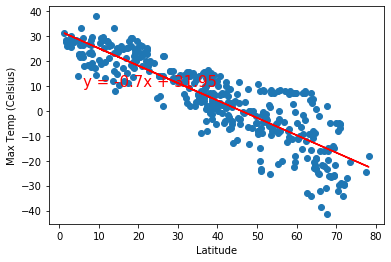

In [15]:
# Print out the r-squared value along with the plot.
x_values = northhem['Lat']
y_values = northhem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Celsius)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4587739548009759


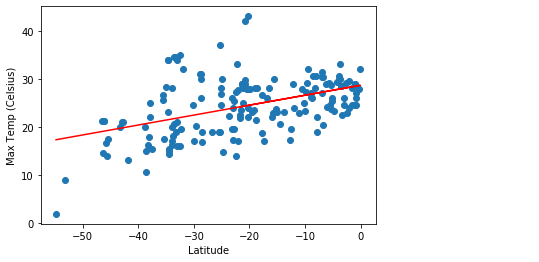

In [16]:
# Print out the r-squared value along with the plot.
x_values = southhem['Lat']
y_values = southhem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Celsius)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.36540153672028514


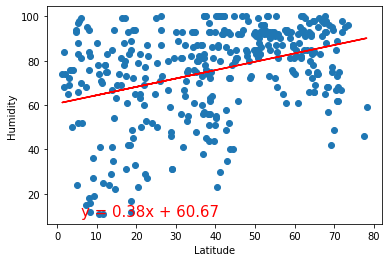

In [17]:
# Print out the r-squared value along with the plot.
x_values = northhem['Lat']
y_values = northhem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2322465247570752


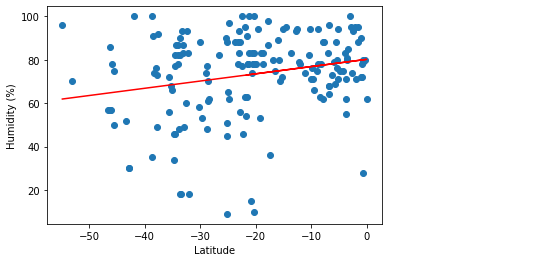

In [18]:
# Print out the r-squared value along with the plot.
x_values = southhem['Lat']
y_values = southhem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2948213279495659


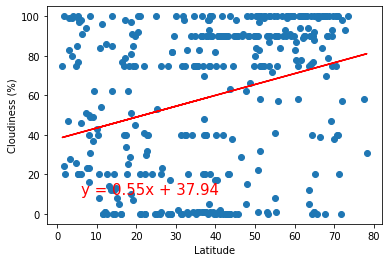

In [19]:
# Print out the r-squared value along with the plot.
x_values = northhem['Lat']
y_values = northhem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14811551806886325


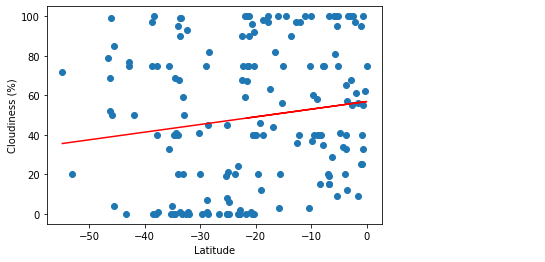

In [20]:
x_values = southhem['Lat']
y_values = southhem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1933893092620221


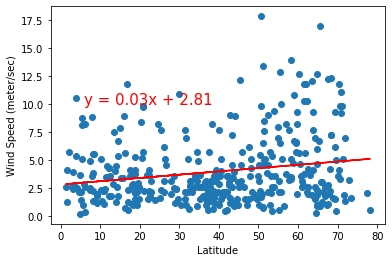

In [21]:
# Print out the r-squared value along with the plot.
x_values = northhem['Lat']
y_values = northhem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meter/sec)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.31672809463362833


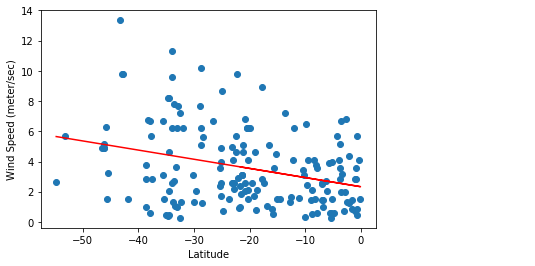

In [22]:
x_values = southhem['Lat']
y_values = southhem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meter/sec)')
print(f"The r-squared is: {rvalue}")
plt.show()